In [1]:
import cv2
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.decomposition import sparse_encode
import matplotlib.pyplot as plt
import os

Mainly for classification through low resolution data and doesn't care about small data

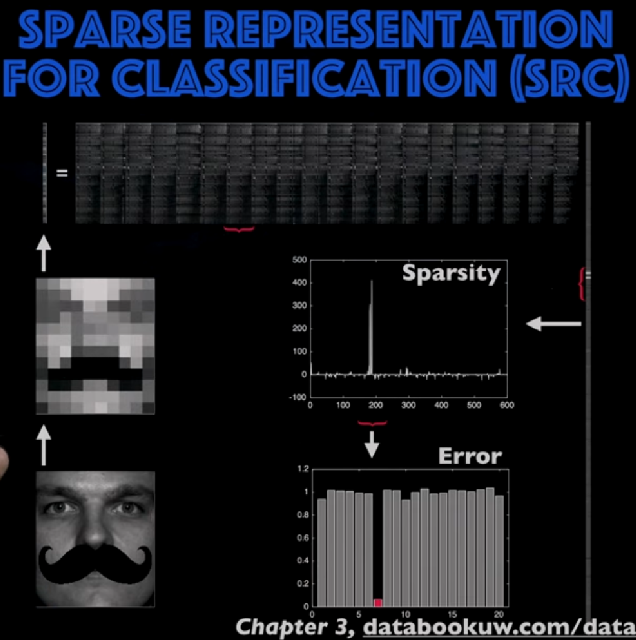

In [2]:
def compress(image_path, n_atoms, alpha):
  # Read the original image
  original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # Get the original image size in kilobytes
  original_size_kb = os.path.getsize(image_path) / 1024

  # Display the original image size
  print(f"Original Image Size: {original_size_kb:.2f} KB")

  # Prepare the data for compression
  data = original_image.reshape(-1, 1)  # Flatten the image to a 1D array

  # Initialize the dictionary (you can use a random one or another method)
  dictionary = np.random.randn(n_atoms, data.shape[1])

  # Use K-SVD to learn a structured dictionary
  _, sparse_coefficients, dictionary = sparse_encode(
      data.T, dictionary_init=dictionary, n_nonzero_coefs=n_atoms, alpha=alpha, max_iter=50
  )

  # Reconstruct the compressed data
  reconstructed_data = np.dot(sparse_coefficients, dictionary).reshape(-1, 1)

  # Reshape the reconstructed data to the original image shape
  reconstructed_image = reconstructed_data.reshape(original_image.shape)

  # Calculate the compressed image size in kilobytes
  compressed_size_kb = sparse_coefficients.nbytes / 1024

  # Display the compressed image size
  print(f"Compressed Image Size: {compressed_size_kb:.2f} KB")

  # Calculate the compression ratio
  compression_ratio = original_size_kb / compressed_size_kb
  print(f"Compression Ratio: {compression_ratio:.2f}")

  # Display the original and reconstructed images side by side
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(original_image, cmap='gray')

  plt.subplot(1, 2, 2)
  plt.title(f"Reconstructed Image (CR: {compression_ratio:.2f})")
  plt.imshow(reconstructed_image, cmap='gray')

  plt.tight_layout()
  plt.show()

In [3]:
compress('pexels-eberhard-grossgasteiger-1367192.jpg', 100, 0.001)

Original Image Size: 652.81 KB


TypeError: missing a required argument: 'dictionary'

### no improvment

Original Image Size: 652.81 KB
Compressed Image Size: 0.78 KB
Compression Ratio: 835.60


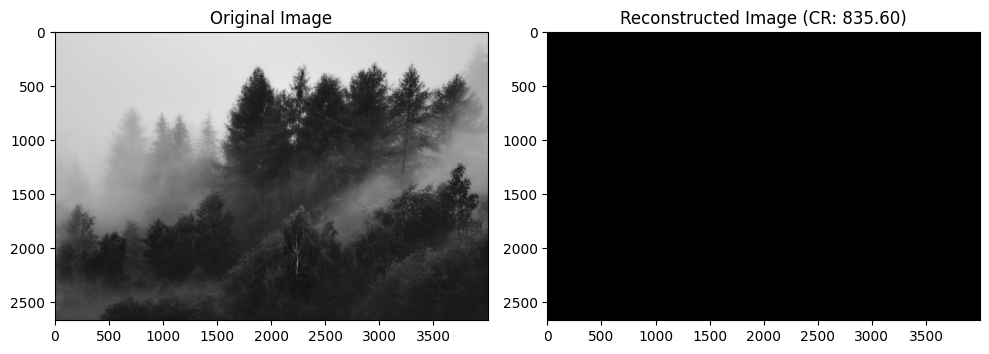

In [ ]:
compress('pexels-eberhard-grossgasteiger-1367192.jpg', 100, 0.1)

Original Image Size: 58.74 KB
Compressed Image Size: 0.78 KB
Compression Ratio: 75.19


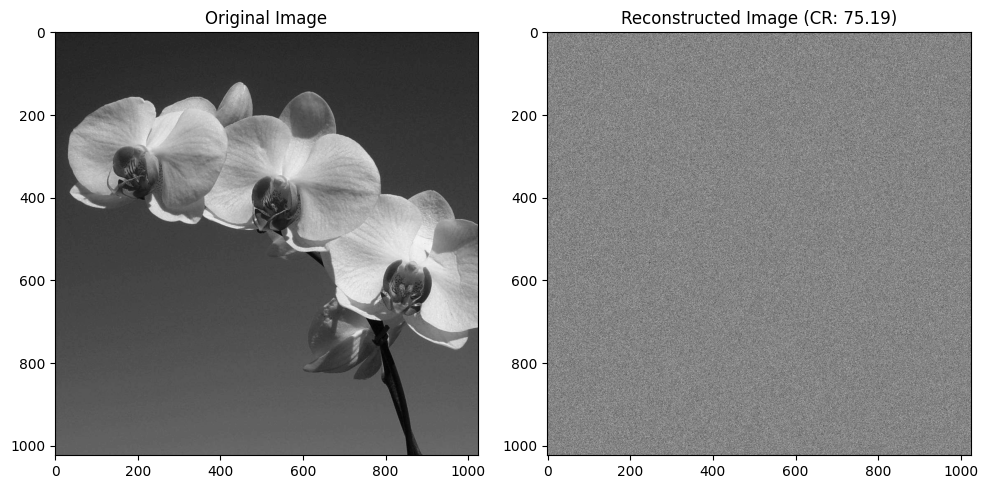

In [ ]:
compress('nature-7.jpg', 100, 0.001)

Original Image Size: 58.74 KB
Compressed Image Size: 7.81 KB
Compression Ratio: 7.52


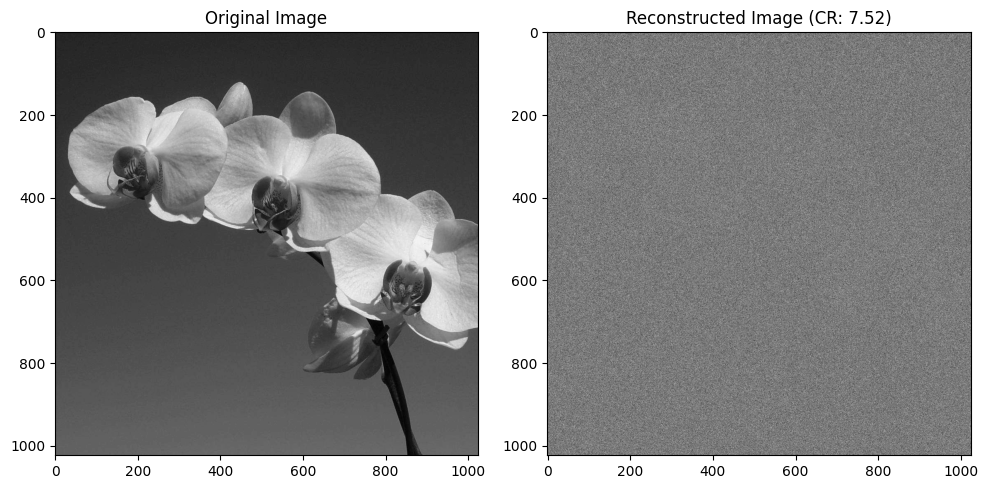

In [ ]:
compress('nature-7.jpg', 1000, 0.001)

In [ ]:
compress('nature-7.jpg', 3000, 0.001)

Original Image Size: 58.74 KB


: 

Original Image Size: 51.28 KB
Compressed Image Size: 7.81 KB
Compression Ratio: 6.56


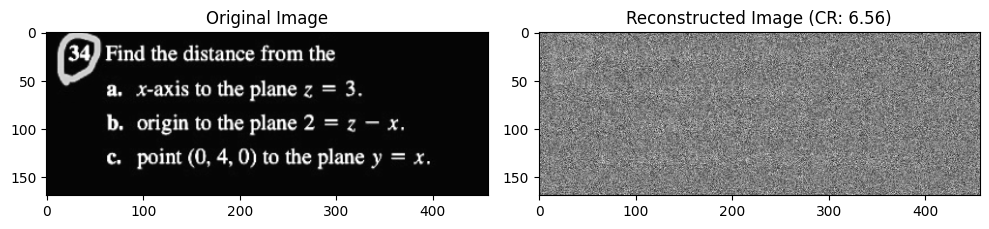

In [ ]:
compress('image.png', 1000, 0.001)

Original Image Size: 51.28 KB
Compressed Image Size: 78.12 KB
Compression Ratio: 0.66


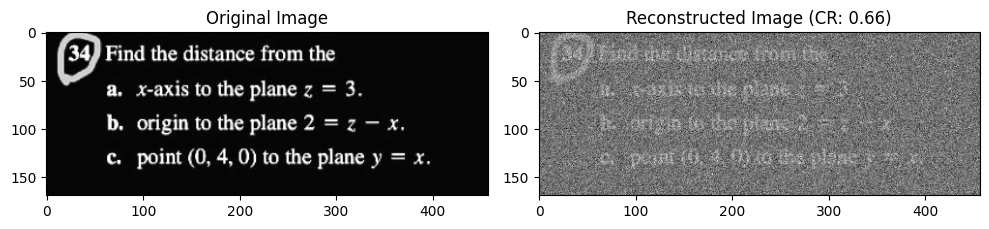

In [ ]:
compress('image.png', 10000, 0.001)

Original Image Size: 51.28 KB
Compressed Image Size: 78.12 KB
Compression Ratio: 0.66


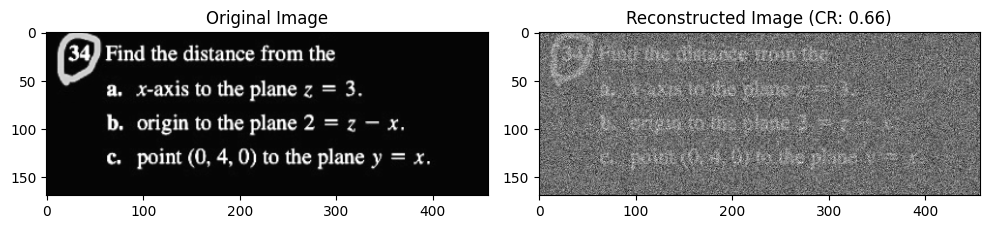

In [ ]:
compress('image.png', 10000, 0.000001)

Original Image Size: 51.28 KB
Compressed Image Size: 78.12 KB
Compression Ratio: 0.66


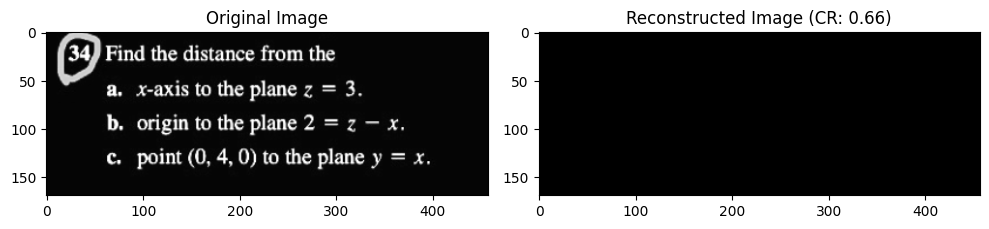

In [ ]:
compress('image.png', 10000, 1)